# AdaBoost Hyperparameters | GridSearchCV in Adaboost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [3]:
np.random.seed(42)
X,y = make_circles(n_samples=500, factor = 0.1, noise=0.35, random_state=42)

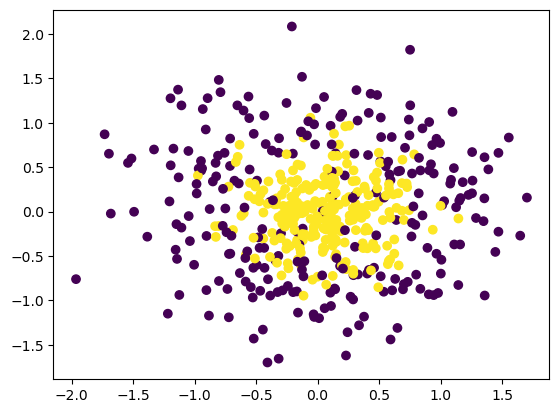

In [4]:
plt.scatter(X[:,0],X[:,1], c=y)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [16]:
abc = AdaBoostClassifier(algorithm= 'SAMME')
np.mean(cross_val_score(abc,X,y, scoring='accuracy', cv=10))

0.812

In [17]:
abc.fit(X,y)

AdaBoostClassifier(algorithm='SAMME')

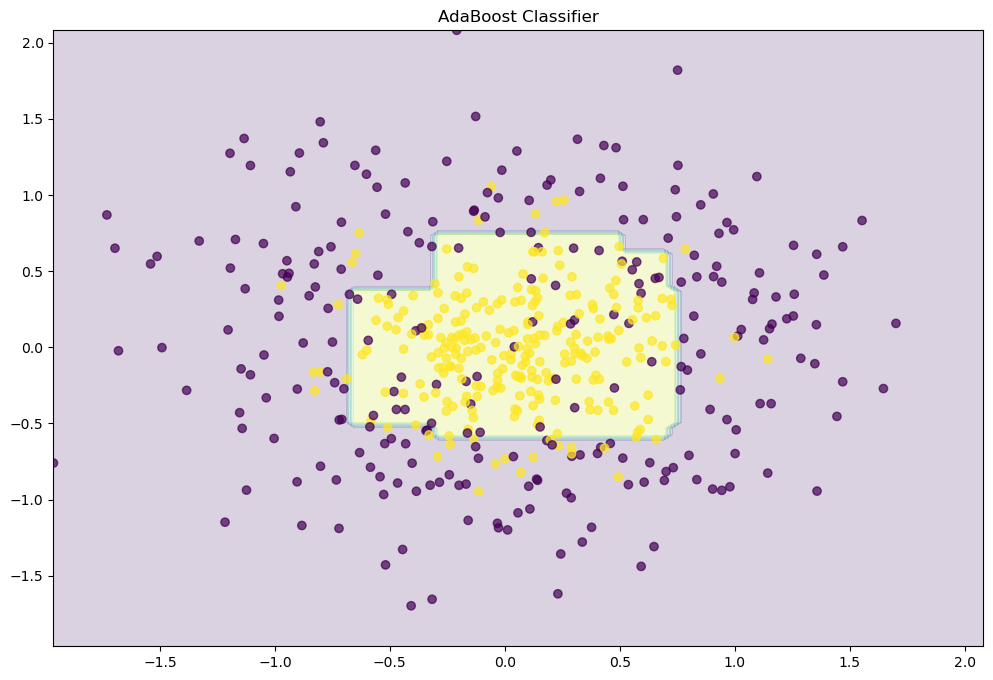

In [18]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12,8))
    x_range = np.linspace(X.min(), X.max(),100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0],X[:,1], c=y, cmap='viridis', alpha=0.7)
    plt.title('AdaBoost Classifier')

plot_decision_boundary(abc)

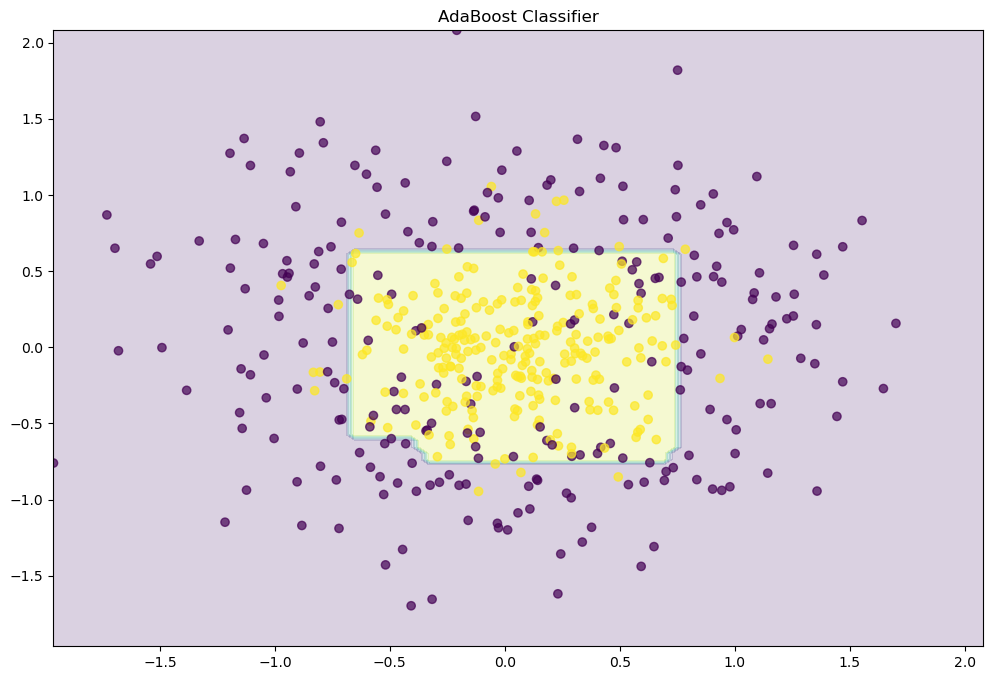

In [19]:
abc = AdaBoostClassifier(n_estimators =100, learning_rate=0.1, algorithm='SAMME')
abc.fit(X,y)
plot_decision_boundary(abc)

In [14]:
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME']


In [15]:
grid_search = GridSearchCV(estimator= AdaBoostClassifier(), param_grid=grid, n_jobs=1, cv=10, scoring='accuracy')
grid_result = grid_search.fit(X,y)
print('Best: %f using %s' %(grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
